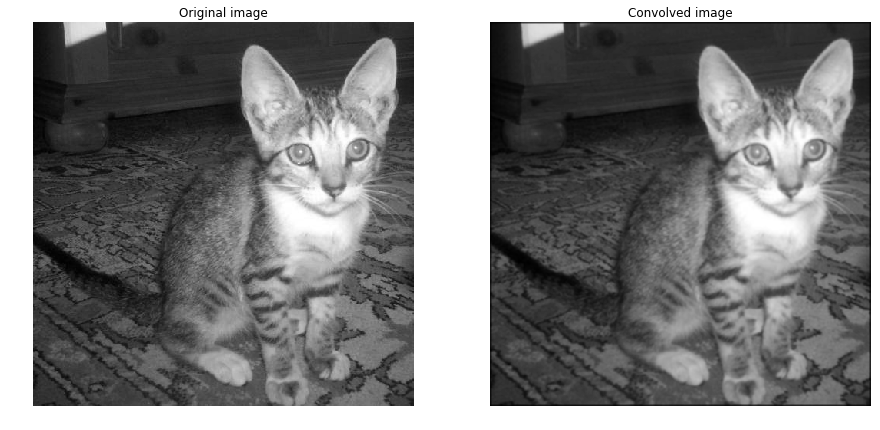

In [1]:
from scipy.signal import convolve2d
import numpy as np 
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('cat.7.jpg')

# 轉換圖像為灰階
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#顯示卷積前後的差異
def show_differences(kernel):
    convolved = convolve2d(image, kernel)
    fig = plt.figure(figsize=(15, 15))
    plt.subplot(121)
    plt.title('Original image')
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    
    plt.subplot(122)
    plt.title('Convolved image')
    plt.axis('off')
    plt.imshow(convolved, cmap='gray')
    return convolved

#卷積核1,box blur(盒型模糊)通常用於去噪音
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
dx = show_differences(kernel)

#output = show_differences(kernel)
plt.show()


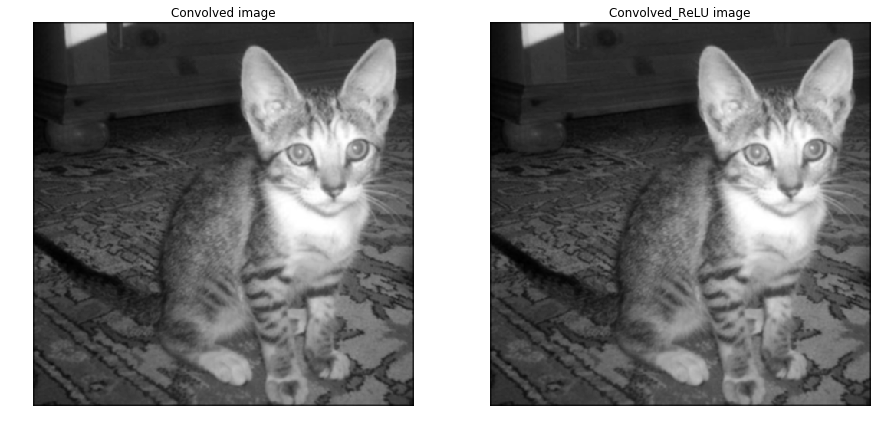

In [2]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.title('Convolved image')
plt.axis('off')
plt.imshow(dx, cmap='gray')

dx_relu=np.maximum(dx,0)
plt.subplot(122)
plt.title('Convolved_ReLU image')
plt.axis('off')
plt.imshow(dx_relu, cmap='gray')
plt.show()

In [3]:
def pooling(inputMap,poolSize=3,poolStride=2,mode='max'):
    in_row,in_col = np.shape(inputMap)
    out_row,out_col = int(np.floor(in_row/poolStride)),int(np.floor(in_col/poolStride))
    row_remainder,col_remainder = np.mod(in_row,poolStride),np.mod(in_col,poolStride)
    if row_remainder != 0:
        out_row +=1
    if col_remainder != 0:
        out_col +=1
    outputMap = np.zeros((out_row,out_col))
    
    temp_map = np.lib.pad(inputMap, ((0,poolSize-row_remainder),(0,poolSize-col_remainder)), 'edge')
    
    for r_idx in range(0,out_row):
        for c_idx in range(0,out_col):
            startX = c_idx * poolStride
            startY = r_idx * poolStride
            poolField = temp_map[startY:startY + poolSize, startX:startX + poolSize]
            poolOut = np.max(poolField)
            outputMap[r_idx,c_idx] = poolOut
    
    return  outputMap

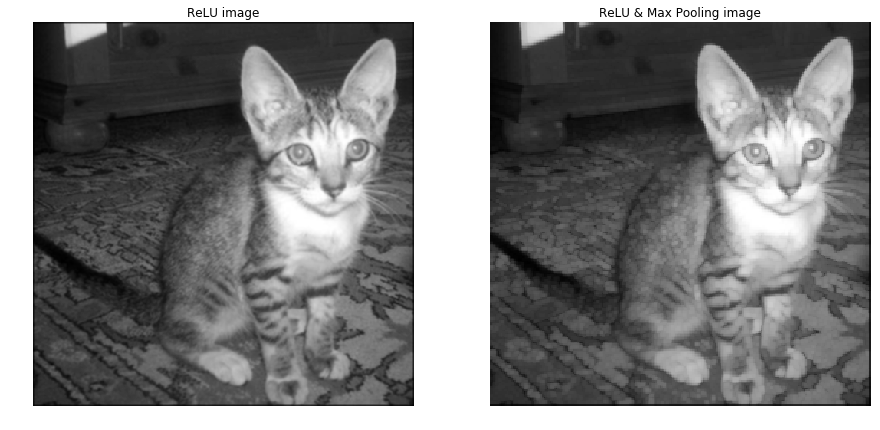

In [4]:
dx_relu_pooling = pooling(dx_relu)

fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.title('ReLU image')
plt.axis('off')
plt.imshow(dx_relu, cmap='gray')

plt.subplot(122)
plt.title('ReLU & Max Pooling image')
plt.axis('off')
plt.imshow(dx_relu_pooling, cmap='gray')

plt.show()

In [5]:
print(dx.shape)
print(dx_relu.shape)
print(dx_relu_pooling.shape)

(501, 497)
(501, 497)
(251, 249)


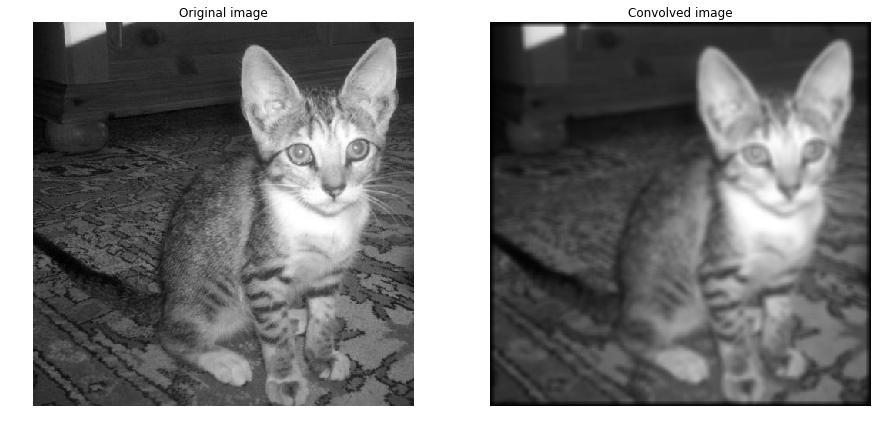

In [6]:
#使用更大的卷積核
kernel = np.ones((8,8),np.float32)/64
dx_64 = show_differences(kernel)
plt.show()

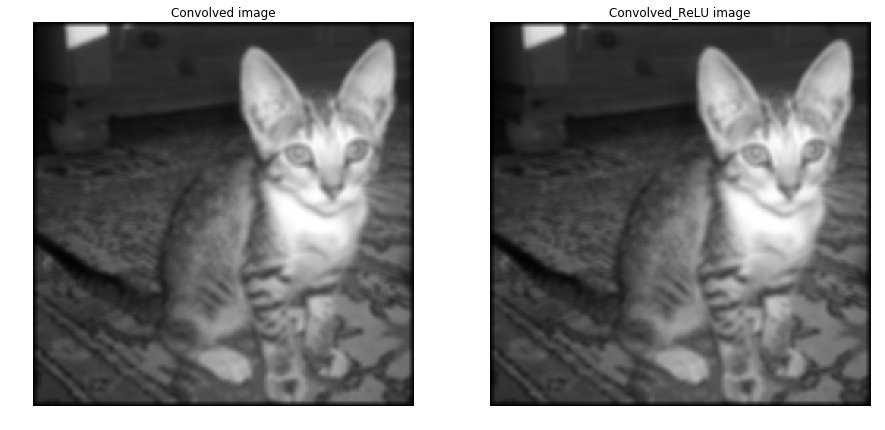

In [7]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.title('Convolved image')
plt.axis('off')
plt.imshow(dx_64, cmap='gray')

dx_relu=np.maximum(dx_64,0)
plt.subplot(122)
plt.title('Convolved_ReLU image')
plt.axis('off')
plt.imshow(dx_relu, cmap='gray')
plt.show()

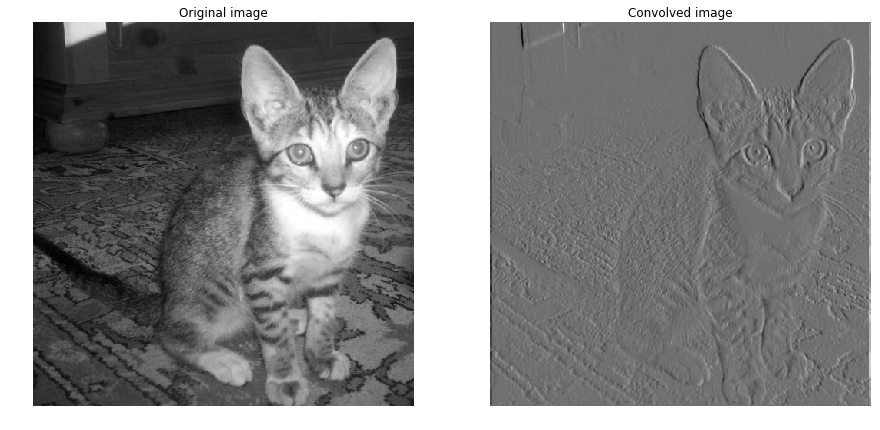

In [8]:
#卷積核2，用來捕捉邊緣(垂直方向的變化)
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
dx_v = show_differences(kernel)
plt.show()

#請注意貓咪的耳朵變得較明顯了

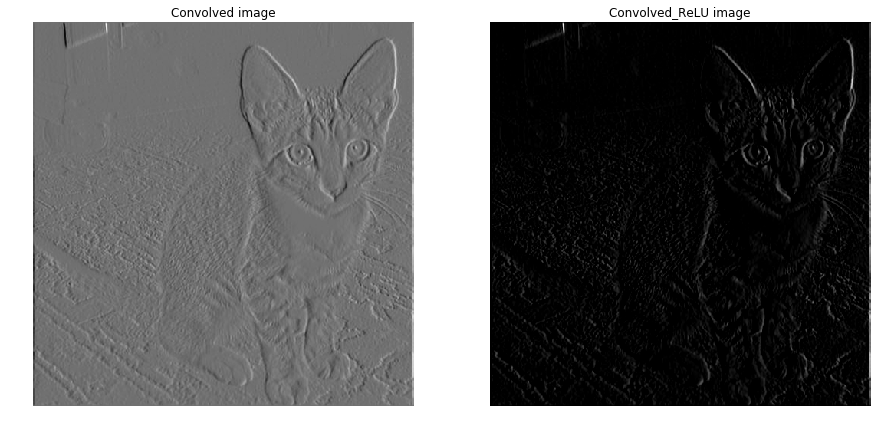

In [9]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.title('Convolved image')
plt.axis('off')
plt.imshow(dx_v, cmap='gray')

dx_relu=np.maximum(dx_v,0)
plt.subplot(122)
plt.title('Convolved_ReLU image')
plt.axis('off')
plt.imshow(dx_relu, cmap='gray')
plt.show()

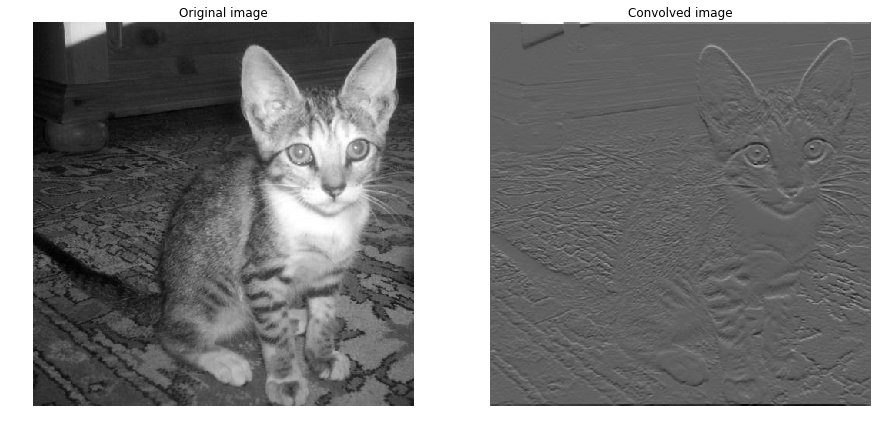

In [10]:
#卷積核3，水平方向的變化
kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
dx_h = show_differences(kernel)

plt.show()

#現在貓咪的鬍鬚變得明顯，但耳朵部分就沒那麼明顯

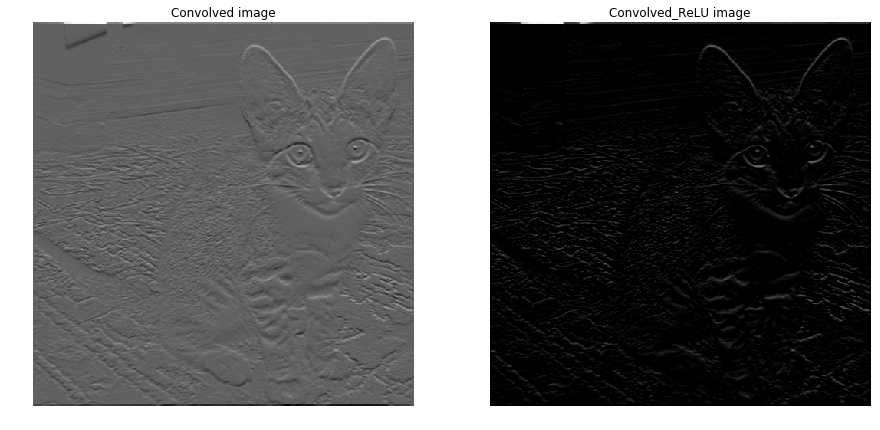

In [11]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.title('Convolved image')
plt.axis('off')
plt.imshow(dx_h, cmap='gray')

dx_relu=np.maximum(dx_h,0)
plt.subplot(122)
plt.title('Convolved_ReLU image')
plt.axis('off')
plt.imshow(dx_relu, cmap='gray')
plt.show()

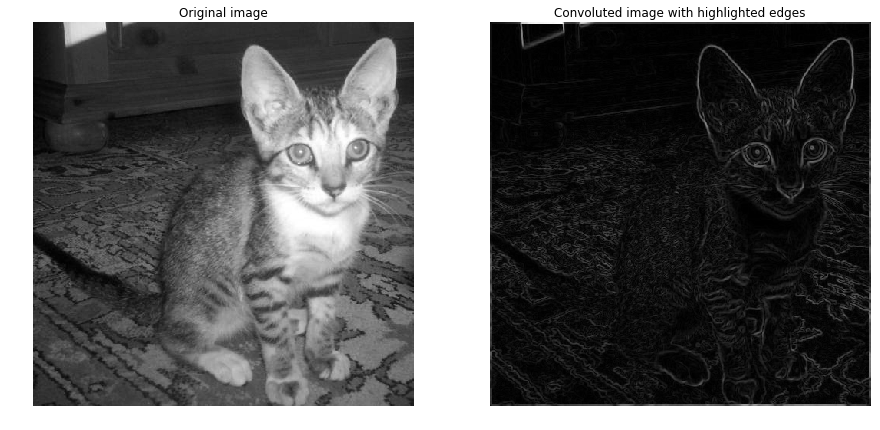

In [12]:
#dx_v,dx_h前面已經產生

mag = np.hypot(dx_v, dx_h)  #結合垂直與水平變化
mag *= 255.0 / np.max(mag)  # normalize (Q&D)

fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(122)
plt.title('Convoluted image with highlighted edges')
plt.axis('off')
plt.imshow(mag, cmap='gray')

plt.show()

#貓咪的輪廓變得明顯了

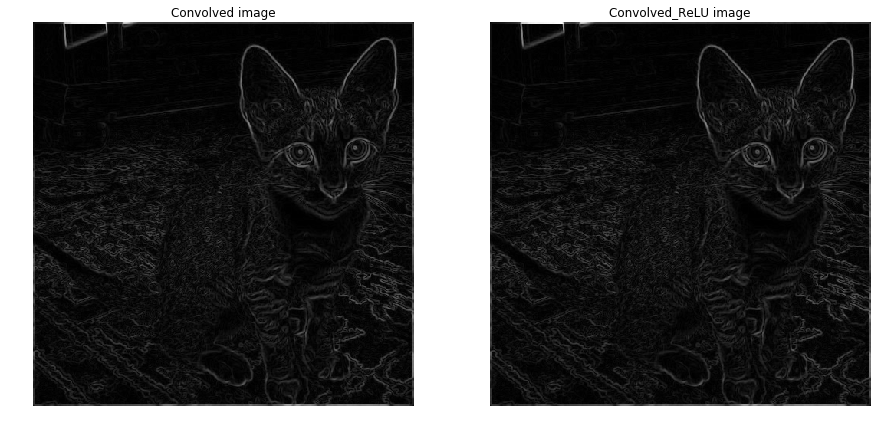

In [13]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.title('Convolved image')
plt.axis('off')
plt.imshow(mag, cmap='gray')

dx_relu=np.maximum(mag,0)
plt.subplot(122)
plt.title('Convolved_ReLU image')
plt.axis('off')
plt.imshow(dx_relu, cmap='gray')
plt.show()

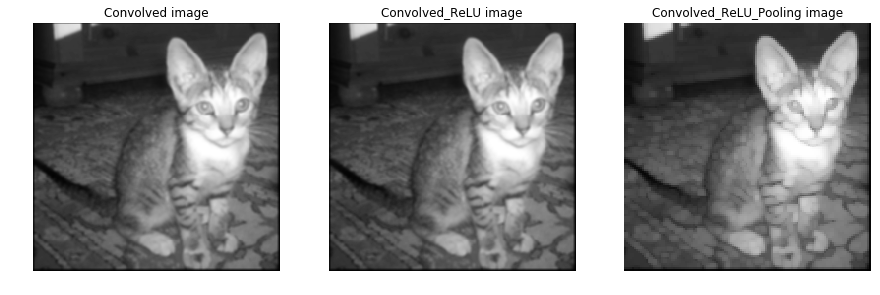

In [14]:
#再次卷積，ReLU，Pooling
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
dx1 = convolve2d(dx_relu_pooling, kernel)
dx1_relu = np.maximum(dx1,0)
dx1_relu_pooling = pooling(dx1_relu)
fig = plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.title('Convolved image')
plt.axis('off')
plt.imshow(dx1, cmap='gray')

plt.subplot(132)
plt.title('Convolved_ReLU image')
plt.axis('off')
plt.imshow(dx1_relu, cmap='gray')

plt.subplot(133)
plt.title('Convolved_ReLU_Pooling image')
plt.axis('off')
plt.imshow(dx1_relu_pooling, cmap='gray')

plt.show()

In [15]:
print(dx1.shape)
print(dx1_relu.shape)
print(dx1_relu_pooling.shape)

(253, 251)
(253, 251)
(127, 126)


In [16]:
#再重複執行3次
for i in range(3):
    kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
    dx1 = convolve2d(dx1_relu_pooling, kernel)
    dx1_relu = np.maximum(dx1,0)
    dx1_relu_pooling = pooling(dx1_relu)

In [17]:
print(dx1.shape)
print(dx1_relu.shape)
print(dx1_relu_pooling.shape)

(36, 35)
(36, 35)
(18, 18)


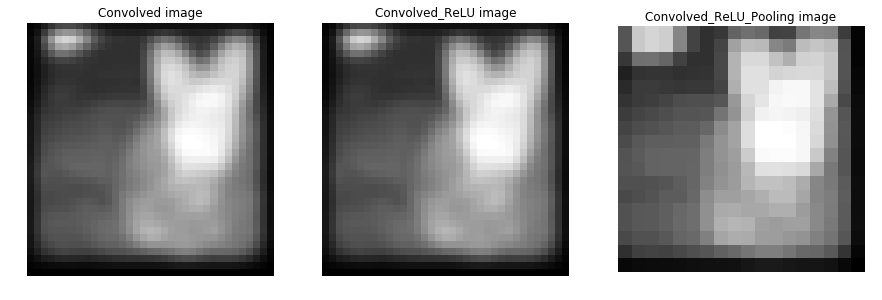

In [18]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.title('Convolved image')
plt.axis('off')
plt.imshow(dx1, cmap='gray')

plt.subplot(132)
plt.title('Convolved_ReLU image')
plt.axis('off')
plt.imshow(dx1_relu, cmap='gray')

plt.subplot(133)
plt.title('Convolved_ReLU_Pooling image')
plt.axis('off')
plt.imshow(dx1_relu_pooling, cmap='gray')

plt.show()